<a href="https://colab.research.google.com/github/ThePituLegend/RISCV-MISE/blob/main/Combinacionals_1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercici 4

Es desitja construir un circuit que donat un número de 3 bits ($a_2$, $a_1$, $a_0$), detecti si el número de 1s és major que el número de 0s.
Per exemple, si les entrades son $a2 = 1$, $a1 = 0$ i $a0 = 0$, el circuit hauria de respondre amb un $0$ donat que el nombre de 1s és menor al nombre de 0s.

A paper:
* Dibuixa la taula de veritat que resumeixi aquest funcionament
* Identifica els minterms
* Escriu la funció booleana associada a aquesta taula com la suma de minterms

Aquí:
* Dibuixa  un circuit  lògic  que  implementi  la  funció  booleana  que  acabes  de construir.

In [1]:
# @title Carregar Py4Hw { display-mode: "form" }
# @markdown Des de GitHub

!pip install nbwavedrom                             &> /dev/null
!git clone https://github.com/ThePituLegend/py4hw   &> /dev/null
%cd /content/py4hw
from py4hw import *

if "py4hw" in dir():
  print("OK")
else:
  print("ERROR")

/content/py4hw
OK


## Disseny del circuit

Completa la següent classe amb la teva proposta de circuit.

**NOTA:** Només disposes de portes lògiques de 2 entrades.

In [15]:
class Circuit(Logic):
  def __init__(self, parent: Logic, name: str, a2: Wire, a1: Wire, a0: Wire, f: Wire):
    super().__init__(parent, name)
    self.addIn("a2", a2)
    self.addIn("a1", a1)
    self.addIn("a0", a0)
    self.addOut("f(a2,a1,a0)", f)

    # TODO: Instancia els cables intermitjos que necessitis
    notA2 = self.wire("~a2")                                    # Alumne
    notA1 = self.wire("~a1")                                    # Alumne
    notA0 = self.wire("~a0")                                    # Alumne

    nA2AndA1 = self.wire("~a2·a1")                              # Alumne
    A2AndNA1 = self.wire("a2·~a1")                              # Alumne
    A2AndA1 = self.wire("a2·a1")                                # Alumne

    and1 = self.wire("~a2·a1·a0")                               # Alumne
    and2 = self.wire("a2·~a1·a0")                               # Alumne
    and3 = self.wire("a2·a1·~a0")                               # Alumne
    and4 = self.wire("a2·a1·a0")                                # Alumne

    or1 = self.wire("(~a2·a1·a0)+(a2·~a1·a0)")                  # Alumne
    or2 = self.wire("(a2·a1·~a0)+(a2·a1·a0)")                   # Alumne

    # TODO: Instancia els blocs funcionals que necesitis
    Not(self, "~a2", a2, notA2)                                 # Alumne
    Not(self, "~a1", a1, notA1)                                 # Alumne
    Not(self, "~a0", a0, notA0)                                 # Alumne

    And(self, "~a2·a1", notA2, a1, nA2AndA1)                    # Alumne
    And(self, "a2·~a1", a2, notA1, A2AndNA1)                    # Alumne
    And(self, "a2·a1", a2, a1, A2AndA1)                         # Alumne

    And(self, "(~a2·a1)·a0", nA2AndA1, a0, and1)                # Alumne
    And(self, "(a2·~a1)·a0", A2AndNA1, a0, and2)                # Alumne
    And(self, "(a2·a1)·~a0", A2AndA1, notA0, and3)              # Alumne
    And(self, "(a2·a1)·a0", A2AndA1, a0, and4)                  # Alumne

    # Or(self, "(~a2·a1·a0)+(a2·~a1·a0)", and1, and2, or1)        # Alumne (Correcte)
    Or(self, "(~a2·a1·a0)+(a2·~a1·a0)", and1, and4, or1)        # Alumne (Incorrecte)
    Or(self, "(a2·a1·~a0)+(a2·a1·a0)", and3, and4, or2)         # Alumne
    Or(self, "(~a2·a1·a0)+(a2·~a1·a0)+(a2·a1·~a0)+(a2·a1·a0)",
       or1, or2, f)                                             # Alumne

iter 3 cost: 0 False


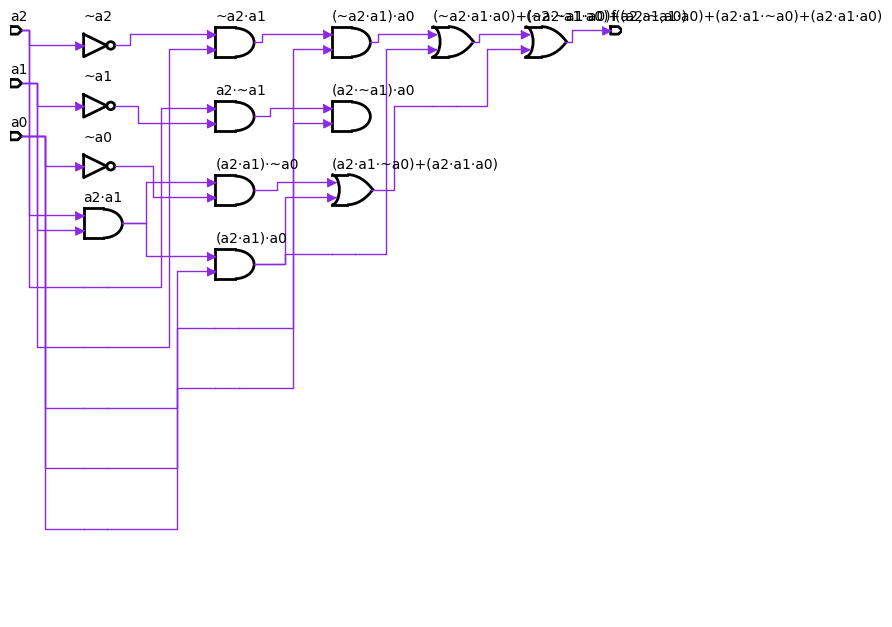

In [16]:
# @title Esquemàtic del circuit implementat { display-mode: "form" }

schm = HWSystem()

a2 = schm.wire("a2", 1)
a1 = schm.wire("a1", 1)
a0 = schm.wire("a0", 1)
f = schm.wire("f", 1)

circuit = Circuit(schm, "Circuit", a2, a1, a0, f)

Schematic(circuit)

In [24]:
# @title És correcte el meu circuit? { display-mode: "form" }
# @markdown El teu circuit passarà una prova automatitzada per a comprovar la seva validesa.

from IPython.display import Markdown, display
pprint = lambda x: display(Markdown(x))

test = HWSystem()

a2 = test.wire("a2", 1)
a1 = test.wire("a1", 1)
a0 = test.wire("a0", 1)
f = test.wire("f", 1)

circuit = Circuit(test, "Circuit", a2, a1, a0, f)

sol = [0, 0, 0, 1, 0, 1, 1, 1]

sol_w = test.wire("Solución", 1)
Sequence(test, "Solución", sol, sol_w)

Sequence(test, "a2", [0]*4 + [1]*4, a2)
Sequence(test, "a1", [0, 0, 1, 1, 0, 0, 1, 1], a1)
Sequence(test, "a0", [i%2 for i in range(8)], a0)

wf = Waveform(test, "TEST", [a2, a1, a0, f, sol_w])

sim = test.getSimulator()

err = 0

for i, val in enumerate(sol):
  sim.clk(1)
  
  if f.get() != val:
    err += 1
    pprint(f"- **CLK {i+1}**: ¡Se esperaba **{val}** y se ha obtenido **{f.get()}**!")
    #wf.waves[f]["wave"] =  wf.waves[f]["wave"][:-1] + "4"
  
if err == 0:
  pprint("**¡Circuito correcto!**")
else:
  pprint(f"**{err}** errores encontrados.")

draw_waveform(wf.get_waveform())    

- **CLK 6**: ¡Se esperaba **1** y se ha obtenido **0**!

**1** errores encontrados.